In [2]:
##Note: only take Magnitude error datas, other errors were repropagated
import numpy as np 
tau=5
F_g=5951
F_r=2246
F_i=545
T=100000

A_e_g=4.006
A_e_r=3.1157
A_e_i=1.7804
n_r=14.5
n_t=.01

n_tg=F_g*A_e_g+0.01+.1*A_e_g*.7
n_tr=F_r*A_e_r+0.01+.1*A_e_r*.9
n_ti=F_i*A_e_i+0.01+.1*A_e_i*.4

SNR_g=((F_g*A_e_g*tau))/((n_r**2+tau*n_tg)**.5)
SNR_r=((F_r*A_e_r*tau))/((n_r**2+tau*n_tr)**.5)
SNR_i=((F_i*A_e_i*tau))/((n_r**2+tau*n_ti)**.5)

error_F_g=F_g/SNR_g
error_F_r=F_r/SNR_r
error_F_i=F_r/SNR_i

D=76.69
D_err=0.02
ZP_g=21.65
ZP_r=21.09

M_g=np.sqrt((-2.5*(np.log10(D)/(F_g*np.log(10)))*error_F_g)**2 +
    ( (-2.5*np.log10(F_g)+ZP_g)*(1/(D*np.log(10)))*D_err)**2)
M_r=np.sqrt((-2.5*(np.log10(D)/(F_g*np.log(10)))*error_F_g)**2 +
    ( (-2.5*np.log10(F_g)+ZP_r)*(1/(D*np.log(10)))*D_err)**2)
print('M error',np.sqrt(M_g**2+M_r**2))

error_t_g=T*(n_r**2+tau*n_t)**.5/(F_g**2*A_e_g*tau)
error_t_r=T*(n_r**2+tau*n_t)**.5/(F_r**2*A_e_r*tau)
#error_t_i=T*(n_r**2+tau*n_t)**.5/(F_i**2*A_e_i*tau)
error=(error_t_g**2+error_t_r**2)**.5

SNR_g=((F_g**2*A_e_g*tau))/((n_r**2+tau*n_t)**.5)
SNR_r=((F_g**2*A_e_r*tau))/((n_r**2+tau*n_t)**.5)
print(F_g/SNR_g)
print(F_r/SNR_r)

print('SNR=',np.sqrt(SNR_g**2+SNR_r**2))
print('Error=',error)


M_g=np.sqrt((-2.5*(np.log10(D)/(F_g*np.log(10)))*error_F_g)**2 +
    ( (-2.5*np.log10(F_g)+ZP_g)*(1/(D*np.log(10)))*D_err)**2)
M_r=np.sqrt((-2.5*(np.log10(D)/(F_g*np.log(10)))*error_F_g)**2 +
    ( (-2.5*np.log10(F_g)+ZP_r)*(1/(D*np.log(10)))*D_err)**2)
print('M error',np.sqrt(M_g**2+M_r**2))

L_g=float((2.60E+25)/(3.83e+26))
L_r=float((1.60E+25)/(3.83e+26))
L_i=float((1.15E+25)/(3.83e+26))

ZP_i=19.91
error_L_g=(0.4*np.log(L_g))*np.sqrt((-2.5*(np.log10(D)/(F_g*np.log(10)))*error_F_g)**2 +
    ( (-2.5*np.log10(F_g)+ZP_g)*(1/(D*np.log(10)))*D_err)**2)
error_L_r=(0.4*np.log(L_r))*np.sqrt((-2.5*(np.log10(D)/(F_r*np.log(10)))*error_F_r)**2 +
    ( (-2.5*np.log10(F_r)+ZP_r)*(1/(D*np.log(10)))*D_err)**2)
error_L_i=(0.4*np.log(L_i))*np.sqrt((-2.5*(np.log10(D)/(F_i*np.log(10)))*error_F_i)**2 +
    ( (-2.5*np.log10(F_i)+ZP_i)*(1/(D*np.log(10)))*D_err)**2)

error_T_g=(error_L_g)/(L_g**(3/4))
error_T_r=(error_L_r)/(L_r**(3/4))
error_T_i=(error_L_i)/(L_i**(3/4))

error_T=np.sqrt(error_T_g**2+error_T_r**2)

print('SNR=',np.sqrt(SNR_g**2+SNR_r**2+SNR_i**2))

print('Error(L_g)=',error_L_g,'Error(L_r)=',error_L_r,'Error(L_i)=',error_L_i)

M error 0.00860468971963801
0.00012166025902700302
5.903694136478405e-05
SNR= 61967830.8172693
Error= 0.018566217280072052
M error 0.00860468971963801
SNR= 61967830.81730682
Error(L_g)= -0.006554277130142206 Error(L_r)= -0.014056875908435254 Error(L_i)= -0.17343654428181818


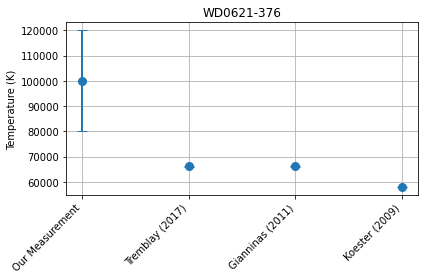

In [15]:
import matplotlib.pyplot as plt
import numpy as np

values = [100000, 66060.0 , 66060, 57806]      # The four data points
errors = [20000, 140, 113.9, 12]   # Corresponding error values
labels = ['Our Measurement', 'Tremblay (2017)', 'Gianninas (2011)', 'Koester (2009)']

x_positions = np.arange(len(values))  # This will be [0, 1, 2, 3]

fig, ax = plt.subplots()

ax.errorbar(x_positions, values, yerr=errors, fmt='o', capsize=5, markersize=8, linewidth=2)

ax.set_xticks(x_positions)
ax.set_xticklabels(labels, rotation=45, ha='right')

ax.set_ylabel('Temperature (K)')
ax.set_title('WD0621-376')

plt.tight_layout()
plt.grid(True)

plt.savefig('WD0621-376')